In [39]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import folium
import geopandas


dataframe = pd.read_csv('home-data.csv',sep=';')
array = dataframe.values

In [40]:
dataframe.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [41]:
dataframe=dataframe.drop(['id','date','zipcode'],axis=1)

In [42]:
dataframe.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [43]:
dataframe.shape

(21613, 18)

In [44]:
dataframe.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:>

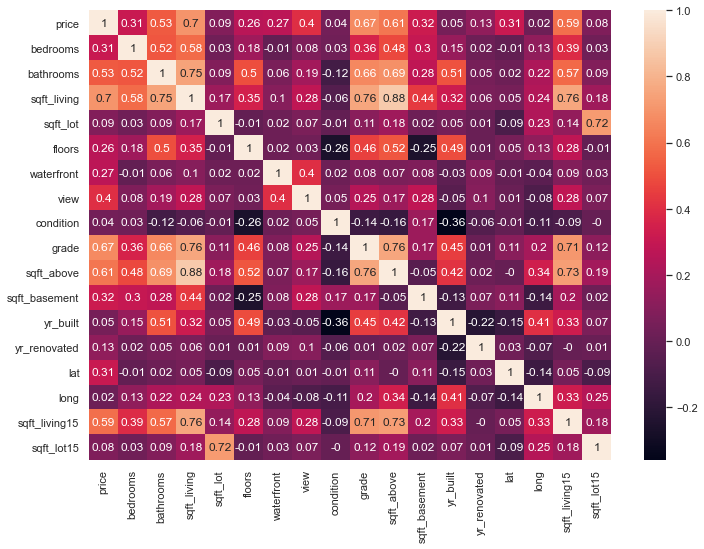

In [8]:
correlation_matrix = dataframe.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

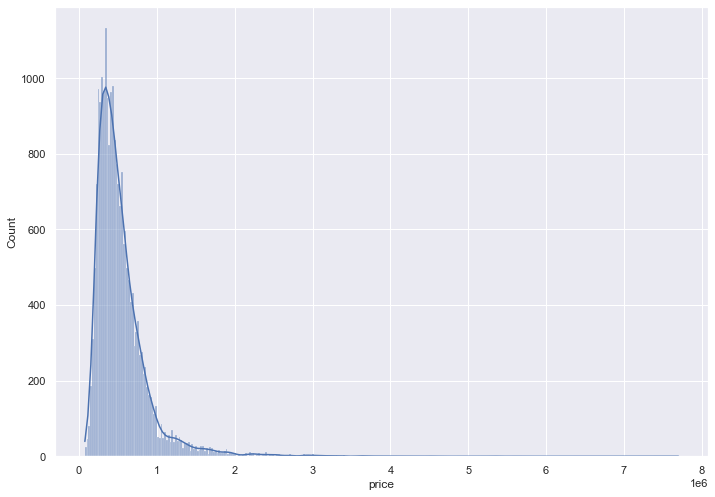

In [9]:
sns.histplot(x=dataframe['price'], bins='auto',stat='count',kde=True)

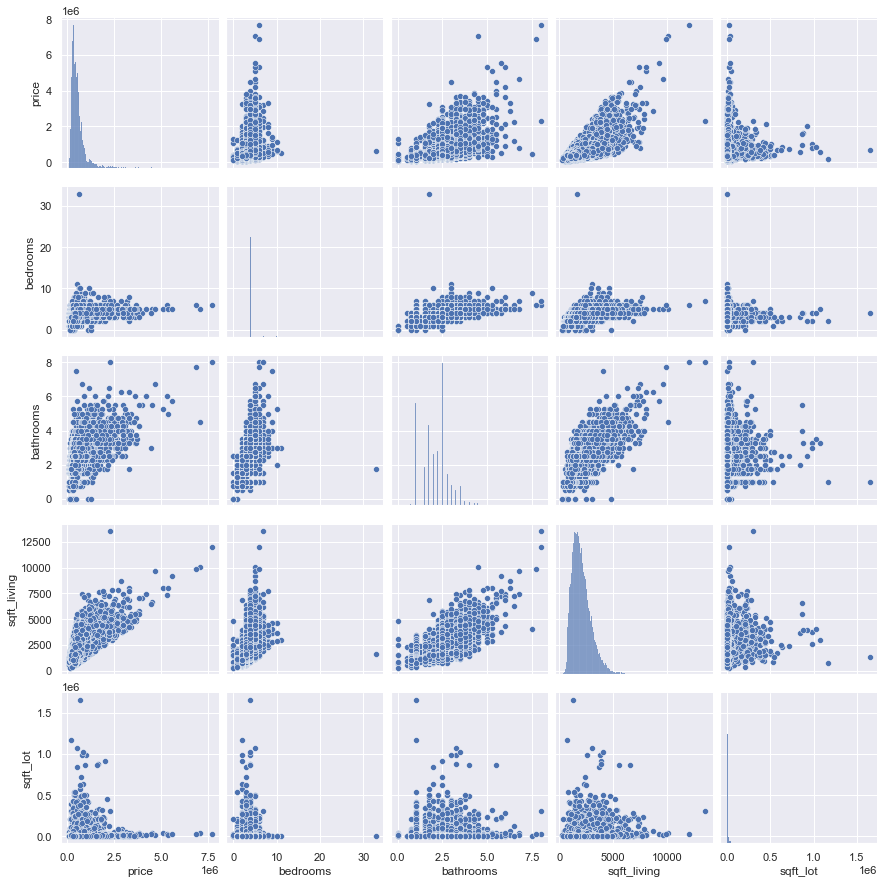

In [10]:
sns.pairplot(data=dataframe,x_vars=['price', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot'],y_vars=['price', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot'])

<AxesSubplot:xlabel='long', ylabel='lat'>

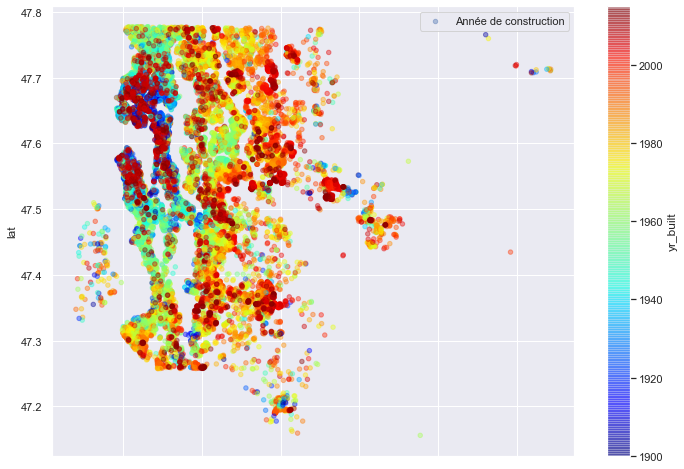

In [11]:
dataframe.plot(kind='scatter',x='long',y='lat',alpha=0.4,c="yr_built",
                cmap=plt.get_cmap("jet"),
               label="Année de construction")

<AxesSubplot:xlabel='long', ylabel='lat'>

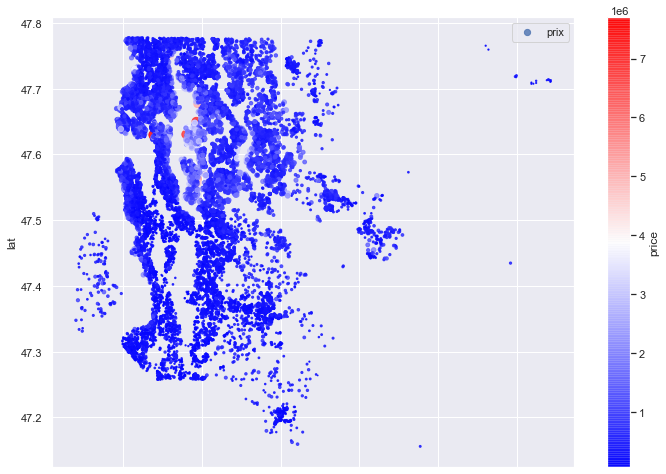

In [12]:
dataframe.plot(kind='scatter',x='long',y='lat',alpha=0.8,c="price",s=dataframe['price']/100000,
                cmap=plt.get_cmap("bwr"),
               label="prix")

In [13]:
import geopandas

In [14]:
gdf = geopandas.GeoDataFrame(
    dataframe, geometry=geopandas.points_from_xy(dataframe.long,dataframe.lat))

In [15]:
gdf.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,geometry
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,POINT (-122.25700 47.51120)
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,POINT (-122.31900 47.72100)
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,POINT (-122.23300 47.73790)
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,POINT (-122.39300 47.52080)
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,POINT (-122.04500 47.61680)


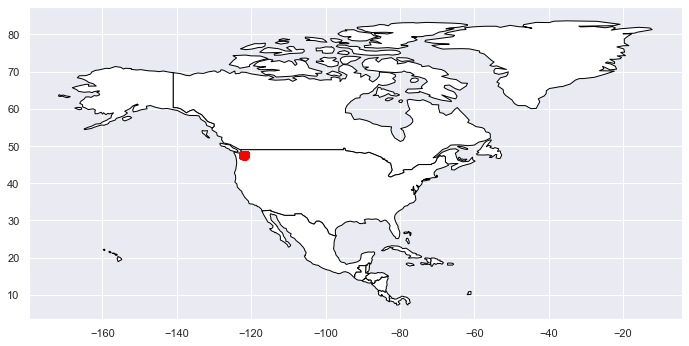

In [16]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to France.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [17]:
import folium

In [18]:
m = folium.Map(location=[47.560053,-122.213896])

In [22]:
for i in range(200) :
    folium.Marker(
        location=[dataframe.iloc[np.random.randint(dataframe.shape[0])]['lat'], dataframe.iloc[np.random.randint(dataframe.shape[0])]['long']],
        popup='prix : '+ str(dataframe.iloc[i]['price']), 
        icon=folium.Icon(color='green')
    ).add_to(m)

In [23]:
m

In [45]:
X=dataframe.iloc[0:,1:]

In [46]:
y=dataframe.iloc[0:,0:1]

In [47]:
from sklearn.preprocessing import StandardScaler

In [50]:
X=StandardScaler().fit_transform(X.values)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [54]:
linreg=LinearRegression()

In [55]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y)

In [56]:
linreg.fit(Xtrain,ytrain)

LinearRegression()

In [58]:
linreg.score(Xtest,ytest)

0.6982066480059096

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [61]:
ypred=linreg.predict(Xtest)

In [62]:
mean_absolute_error(ytest,ypred)

125333.91978270782

In [65]:
mean_squared_error(ytest,ypred,squared=False)

194119.6506615971

In [80]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

In [81]:
cv=5
grilleridge={'alpha':[0.001,0.01,0.1,1,10,100]}

In [82]:
ridge=Ridge()

In [96]:
regression1=GridSearchCV(ridge,param_grid=grilleridge,cv=cv,scoring='r2')

In [97]:
regression1.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [98]:
regression1.best_params_

{'alpha': 100}

In [99]:
regression1.best_score_

0.6932302160509413

In [95]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [106]:
lasso=Lasso(max_iter=100)

In [107]:
regression2=GridSearchCV(lasso,param_grid=grilleridge,cv=cv,scoring='r2')

In [108]:
regression2.fit(Xtrain,ytrain)

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54586655740981.56, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57671516886472.125, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16201628607679.875, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17258412026886.562, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58916399520383.69, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17787034810793.188, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_d

GridSearchCV(cv=5, estimator=Lasso(max_iter=100),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [109]:
regression2.best_score_

0.6932317472423805

In [110]:
regression2.best_params_

{'alpha': 100}

In [112]:
from sklearn.linear_model import RidgeCV
model_RidgeCV = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='r2')
# fit model
model_RidgeCV.fit(Xtrain, ytrain)
# summarize chosen configuration
print('alpha: %f' % model_RidgeCV.alpha_)

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.0846e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


alpha: 0.000000


In [113]:
model_RidgeCV.best_score_

0.6932508695010969

In [114]:
#dans Scikit Learn, il existe une bibliothèque qui fait cela directement
from sklearn.linear_model import LassoCV
model_LassoCV = LassoCV(alphas=np.arange(0.01, 1, 0.01), cv=cv)
# fit model
model_LassoCV.fit(Xtrain, ytrain)
# summarize chosen configuration
print('alpha: %f' % model_LassoCV.alpha_)

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54597805838534.75, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54597623893246.44, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Ob

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7416745003223.8125, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7416713610483.125, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7416682096406.25, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57679950011549.56, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57679800091085.875, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57679651542055.0, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_c

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7884957750319.0, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7884925642028.625, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7884895051973.625, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coo

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16206997153448.75, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16206882516665.125, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16206768476283.25, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57839957670873.06, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57839834966986.19, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57839713582757.75, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16723083662827.125, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16722902803617.75, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16722723770770.562, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259085003422.875, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259062609856.75, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259040241601.6875, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_c

alpha: 0.990000


C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69893483600034.875, tolerance: 223811969603.8606
  model = cd_fast.enet_coordinate_descent(


In [115]:
from sklearn.linear_model import ElasticNetCV
ratios = np.arange(0.01, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0]
model_ECV = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
model_ECV.fit(Xtrain, ytrain)

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277764590563430.28, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268280630734333.94, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: O

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277714845497890.44, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271283212937764.56, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269147762782770.6, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271231985889660.22, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271014368583152.22, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268176413355022.7, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271166655728956.72, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271153332998630.84, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283002529944043.0, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277548119428820.4, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271084895570927.44, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268970219095665.22, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267983293605490.4, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271027253115703.72, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267968390871774.6, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267906420167675.16, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267779604134414.03, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282798280798718.25, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282713458903117.2, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268748095940230.84, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270769401746126.75, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512735582488.9375, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267727598338860.12, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536279899772.375, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1261233383716.0, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1668045910727.8125, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270704024263934.6, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_c

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267526205131848.9, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277024796111675.5, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4262184445695.5, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_c

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465470149791.3125, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12921915271678.625, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276945370036609.2, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2407595746112.0625, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 920307491175.125, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44290339714225.44, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47534833892066.31, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105108835603458.66, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76617296356637.44, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178868033119582.94, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269780554377794.97, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162771877119598.5, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276094862124497.06, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267528754003727.8, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266548109664815.4, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269133337518149.7, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250949367297067.8, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280786857812737.56, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275074891489296.25, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268574915572161.03, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265647065919727.3, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267596648556809.78, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267803334600919.0, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267822063533091.44, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266619115611075.56, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278370525032044.9, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263979069860738.06, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265532315834178.34, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265549060742513.16, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274200951587456.38, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_mod

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275582549668515.44, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257792153512283.0, tolerance: 176476762924.8901
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267874390344271.47, tolerance: 179984523653.85757
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257820082920143.9, tolerance: 178246068116.75204
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267071481110451.44, tolerance: 182681224551.4046
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255537714659727.12, tolerance: 177843520190.97177
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\jmbernabotto\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336945603587931.25, tolerance: 223811969603.8606
  model = cd_fast.enet_coordinate_descent(


ElasticNetCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0], cv=5,
             l1_ratio=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
             n_jobs=-1)

In [116]:
print('alpha: %f' % model_ECV.alpha_)
print('l1_ratio_: %f' % model_ECV.l1_ratio_)

alpha: 0.010000
l1_ratio_: 0.620000


In [119]:
model_ECV.fit_intercept

True

In [122]:
from pycaret.regression import *
regression4 = setup(dataframe, target = 'price', session_id=123, log_experiment=True, experiment_name='home-data')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(21613, 18)"
4,Missing Values,False
5,Numeric Features,12
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [123]:
meilleur_modele = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,65082.9418,14138838983.0194,117474.4464,0.8964,0.1669,0.1242,10.7916
1,Light Gradient Boosting Machine,68659.3596,16565021419.0728,127242.7855,0.8786,0.1753,0.1313,0.3707
2,Extreme Gradient Boosting,70874.5096,17470718823.4970,130682.2843,0.8718,0.1790,0.1334,1.7646
3,Random Forest,71536.8471,18513223127.1376,134851.4923,0.8632,0.1817,0.1345,5.2097
4,Extra Trees Regressor,73212.8781,19721761315.0238,139122.2085,0.8549,0.1858,0.1377,3.5067
5,Gradient Boosting Regressor,81771.6578,19785462277.7496,140071.7146,0.8524,0.2022,0.1573,7.2135
6,Decision Tree,102733.3910,35587635987.9504,187386.6889,0.7362,0.2568,0.1904,0.4322
7,Lasso Regression,119663.9435,37685567654.9502,193634.3227,0.7168,0.3101,0.2333,0.9397
8,Linear Regression,119691.5529,37698551334.6116,193667.9720,0.7167,0.3113,0.2335,0.0499
9,Ridge Regression,119819.1188,37732600893.3923,193727.1415,0.7167,0.3074,0.2340,0.0195
